<a href="https://colab.research.google.com/github/yogeshdhome/Coursera-IBM-AI-ML-Course/blob/master/RegressionModel_ConcreteStrength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
concrete_df = pd.read_csv('/content/sample_data/concrete_data.csv')

In [3]:
concrete_df.shape

(1030, 9)

In [4]:
concrete_df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [7]:
concrete_df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
concrete_df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [11]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [17]:
np.sort(concrete_df['Age'].unique())

array([  1,   3,   7,  14,  28,  56,  90,  91, 100, 120, 180, 270, 360,
       365])

In [24]:
concrete_df.groupby(['Age']).count()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Strength
Age,,,,,,,,
1,2,2,2,2,2,2,2,2
3,134,134,134,134,134,134,134,134
7,126,126,126,126,126,126,126,126
14,62,62,62,62,62,62,62,62
28,425,425,425,425,425,425,425,425
56,91,91,91,91,91,91,91,91
90,54,54,54,54,54,54,54,54
91,22,22,22,22,22,22,22,22
100,52,52,52,52,52,52,52,52


In [6]:
X_train, X_test, y_train, y_test = train_test_split(concrete_df.drop(['Strength'],axis=1), concrete_df['Strength'], test_size=0.3, random_state=101)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(721, 8)
(309, 8)
(721,)
(309,)


In [8]:
n_cols = X_train.shape[1]
n_cols

8

In [9]:
def RegressionNeuralModel():
  # Create model with 1 hidden layer having 10 nodes
  RegressionModel = Sequential()
  RegressionModel.add(Dense(10,activation='relu',input_shape=(n_cols,)))
  RegressionModel.add(Dense(1))

  # Compile the model
  RegressionModel.compile(optimizer='adam',loss='mean_squared_error')
  return RegressionModel

In [10]:
# Build the model
model = RegressionNeuralModel()

In [40]:
# Fit the model with epochs=50
model.fit(X_train,y_train,epochs=50,verbose=1)

Epoch 1/50
23/23 [==============================] - 13s 2ms/step - loss: 1597.9998
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 1055.0661
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 894.5149
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 684.3636
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 550.8759
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 536.3496
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 481.9248
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 367.0489
Epoch 9/50
23/23 [==============================] - 0s 2ms/step - loss: 343.3622
Epoch 10/50
23/23 [==============================] - 0s 2ms/step - loss: 283.5827
Epoch 11/50
23/23 [==============================] - 0s 2ms/step - loss: 247.4574
Epoch 12/50
23/23 [==============================] - 0s 2ms/step - loss: 224.1040
Epoch 13/50
23/23 [===

In [13]:
from sklearn.metrics import mean_squared_error

In [42]:
# Predict the label(y_pred) from X_test
y_pred = model.predict(X_test)

In [43]:
#Mean squared error for current run
print("Mean Squared error = {}".format(mean_squared_error(y_test,y_pred)))

Mean Squared error = 95.83574707043852


In [44]:
#Root Mean square error for current run
print("Root Mean Squared error = {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

Root Mean Squared error = 9.789573385517803


In [51]:
np.random.randint(0,100,1)

array([86])

In [53]:
#Define the function to run steps 1-3 for 50(n) times, also selecting random state dyamically
def MeanSquaredErrors(n):
  i = 0
  mean_error = []
  for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(concrete_df.drop(['Strength'],axis=1), concrete_df['Strength'], test_size=0.3, random_state=np.random.randint(0,100,1)[0])
    model.fit(X_train,y_train,epochs=50,verbose=0)
    mean_error.append(mean_squared_error(y_test,model.predict(X_test)))

  return mean_error

mean_square_list = MeanSquaredErrors(50)

In [54]:
len(mean_square_list)

50

In [57]:
#Mean of the Mean Squared errors from 50 runs
np.mean(mean_square_list)

46.110293425510214

In [58]:
#Standard Deviation of the Mean Squared errors from 50 runs
np.std(mean_square_list)

3.47691892792718

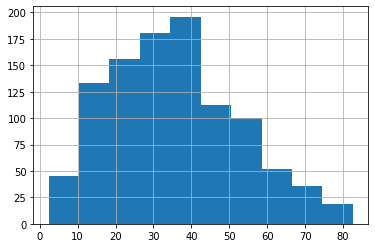

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
concrete_df['Strength'].hist()

In [60]:
concrete_df['Strength'].describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: Strength, dtype: float64

Assignment B : Normalize data

In [12]:
#Normalize step
concrete_df_norm = concrete_df.drop(['Strength'],axis=1)
concrete_df_norm = (concrete_df_norm - concrete_df_norm.mean()) / concrete_df_norm.std()
concrete_df_norm.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [14]:
i = 0
normalized_mean_error = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(concrete_df_norm, concrete_df['Strength'], test_size=0.3, random_state=np.random.randint(0,100,1)[0])
    model.fit(X_train,y_train,epochs=50,verbose=0)
    normalized_mean_error.append(mean_squared_error(y_test,model.predict(X_test)))


In [16]:
print("Mean:", np.mean(normalized_mean_error))
print("Stadard Deviation:", np.std(normalized_mean_error))

Mean: 48.33426766943879
Stadard Deviation: 58.74512628651361


(array([45.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 27.3260055 ,  66.88272421, 106.43944292, 145.99616164,
        185.55288035, 225.10959906, 264.66631777, 304.22303648,
        343.77975519, 383.3364739 , 422.89319261]),
 <a list of 10 Patch objects>)

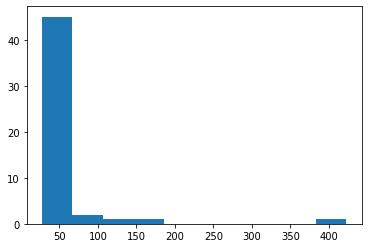

In [18]:
plt.hist(normalized_mean_error)

C. Epochs = 100

In [19]:
# Run step B with 100 epochs

i = 0
normalized_mean_error_epoch_100 = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(concrete_df_norm, concrete_df['Strength'], test_size=0.3, random_state=np.random.randint(0,100,1)[0])
    model.fit(X_train,y_train,epochs=100,verbose=0)
    normalized_mean_error_epoch_100.append(mean_squared_error(y_test,model.predict(X_test)))

print("Mean:", np.mean(normalized_mean_error_epoch_100))
print("Stadard Deviation:", np.std(normalized_mean_error_epoch_100))

Mean: 28.172140483673342
Stadard Deviation: 2.315007160705319


D. Increase Number of Hidden layers

In [21]:
# Build model with 3 hidden layers of 10 nodes each
RegressionModel1 = Sequential()
RegressionModel1.add(Dense(10,activation='relu',input_shape=(n_cols,)))
RegressionModel1.add(Dense(10,activation='relu'))
RegressionModel1.add(Dense(10,activation='relu'))
RegressionModel1.add(Dense(1))

# Compile the model
RegressionModel1.compile(optimizer='adam',loss='mean_squared_error')

#Run 50 times
i = 0
normalized_mean_error_epoch_50 = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(concrete_df_norm, concrete_df['Strength'], test_size=0.3, random_state=np.random.randint(0,100,1)[0])
    RegressionModel1.fit(X_train,y_train,epochs=50,verbose=0)
    normalized_mean_error_epoch_50.append(mean_squared_error(y_test,RegressionModel1.predict(X_test)))

print("Mean:", np.mean(normalized_mean_error_epoch_50))
print("Stadard Deviation:", np.std(normalized_mean_error_epoch_50))

Mean: 35.56403737505913
Stadard Deviation: 23.556256982245323
